# Let's test the central limit theorem

Credits: Alizé Papp

Strong inspiration: Chris Albon's code, [here](https://github.com/chrisalbon/chrisalbon_com/blob/primary/content/code/statistics/frequentist/demonstrate_the_central_limit_theorem.md)

Exercises:
1. Run the notebook and read the comments
1. Try changing different things in the code. How does it change the distribution of the empirical mean?
  - the distribution (hint: you can use the distribution suggested in the comments, or any from https://numpy.org/doc/stable/reference/random/legacy.html#distributions).
  - the sample size


In [1]:
# Import packages
import pandas as pd
import numpy as np

# Set matplotlib as inline
%matplotlib inline  

## Create a population
First we start by generating values for a population. We can pick any distribution here

<AxesSubplot: >

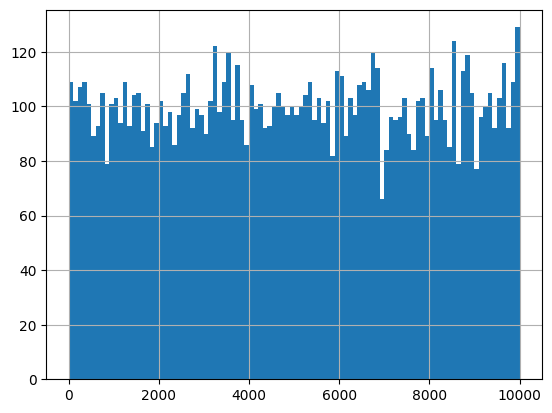

In [2]:
## Create an empty dataframe
population = pd.DataFrame()
population_size = 10000
# Create an column that is 10000 random numbers drawn from a uniform distribution

population['numbers'] = np.random.uniform(0,10000,size=population_size)
# Plot a histogram of the score data.
# This confirms the data is not a normal distribution.
population['numbers'].hist(bins=100)

# Suggestions:
# 1. A bimodal distribution
# population['cluster'] = np.random.choice([0, 1], size=population_size)
# population['numbers'] = population['cluster'] * np.random.normal(0, 1, size=population_size) + (1 - population['cluster']) * np.random.normal(10, 5, size=population_size)
# 2. A U-shaped distribution
# population['numbers'] = np.random.beta(0.5, 0.5, size=population_size)

In [3]:
# View the mean of the population
population['numbers'].mean()

5019.170248715092

# Samples out of the population
Now let's create 1000 samples out of this population and see how the mean of the samples behaves.

In [4]:
sample_size = 100
# Create a list
sampled_means = []

for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=sample_size).mean().values[0])


<AxesSubplot: >

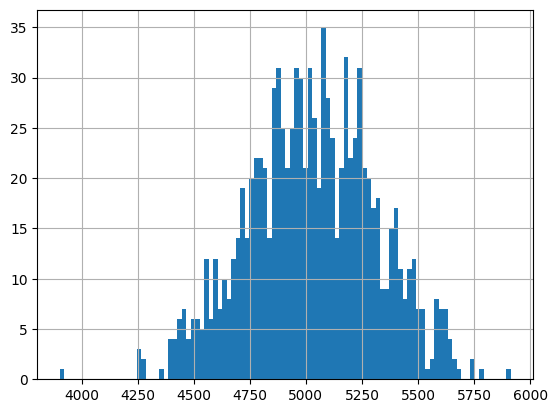

In [5]:
# Plot a histogram of sampled_means. 
# It is clearly normally distributed and centered around 5000
pd.Series(sampled_means).hist(bins=100)

This is the critical chart, remember that the population distribution was uniform, however, this distribution is approaching normality. This is the key point to the central limit theory

In [6]:
# View the mean of the sampled_means
print("Sample mean: ", pd.Series(sampled_means).mean())
# Subtract Mean Sample Mean From True Population Mean
error = population['numbers'].mean() - pd.Series(sampled_means).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

Sample mean:  5026.259297926894
The Mean Sample Mean is only -7.089049 different the True Population mean!
